In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set()

In [2]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.shape

(299, 13)

### Objectif : prediction Patient decédée ou pas decée durant la periode de suivi  

In [6]:
### variable cible : DEATH_EVENTS

In [7]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


###  Preprocessing 


In [9]:
from imblearn.combine import SMOTEENN, SMOTETomek ### reequilibre les données 
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler ,scale

###### Pas de données manquantes et toutes les variables sont numeriques(on considere les variables 0,1 comme categorielle 

###  Dataviz

In [10]:
def remove_list(x,liste):
    """
    Function for removing values from a list
    """
    copy = x.copy()
    for el in liste:
        copy.remove(el)
    return copy

In [11]:
# On stocke les noms des variables
var_names = data.drop('DEATH_EVENT' , axis = 1 ).columns
categorical_var = ['anaemia' , 'diabetes' , 'high_blood_pressure' , 'sex' , 'smoking']
quantitative_var = remove_list(list(var_names) , categorical_var)

### Visualisations des variables quantitatives

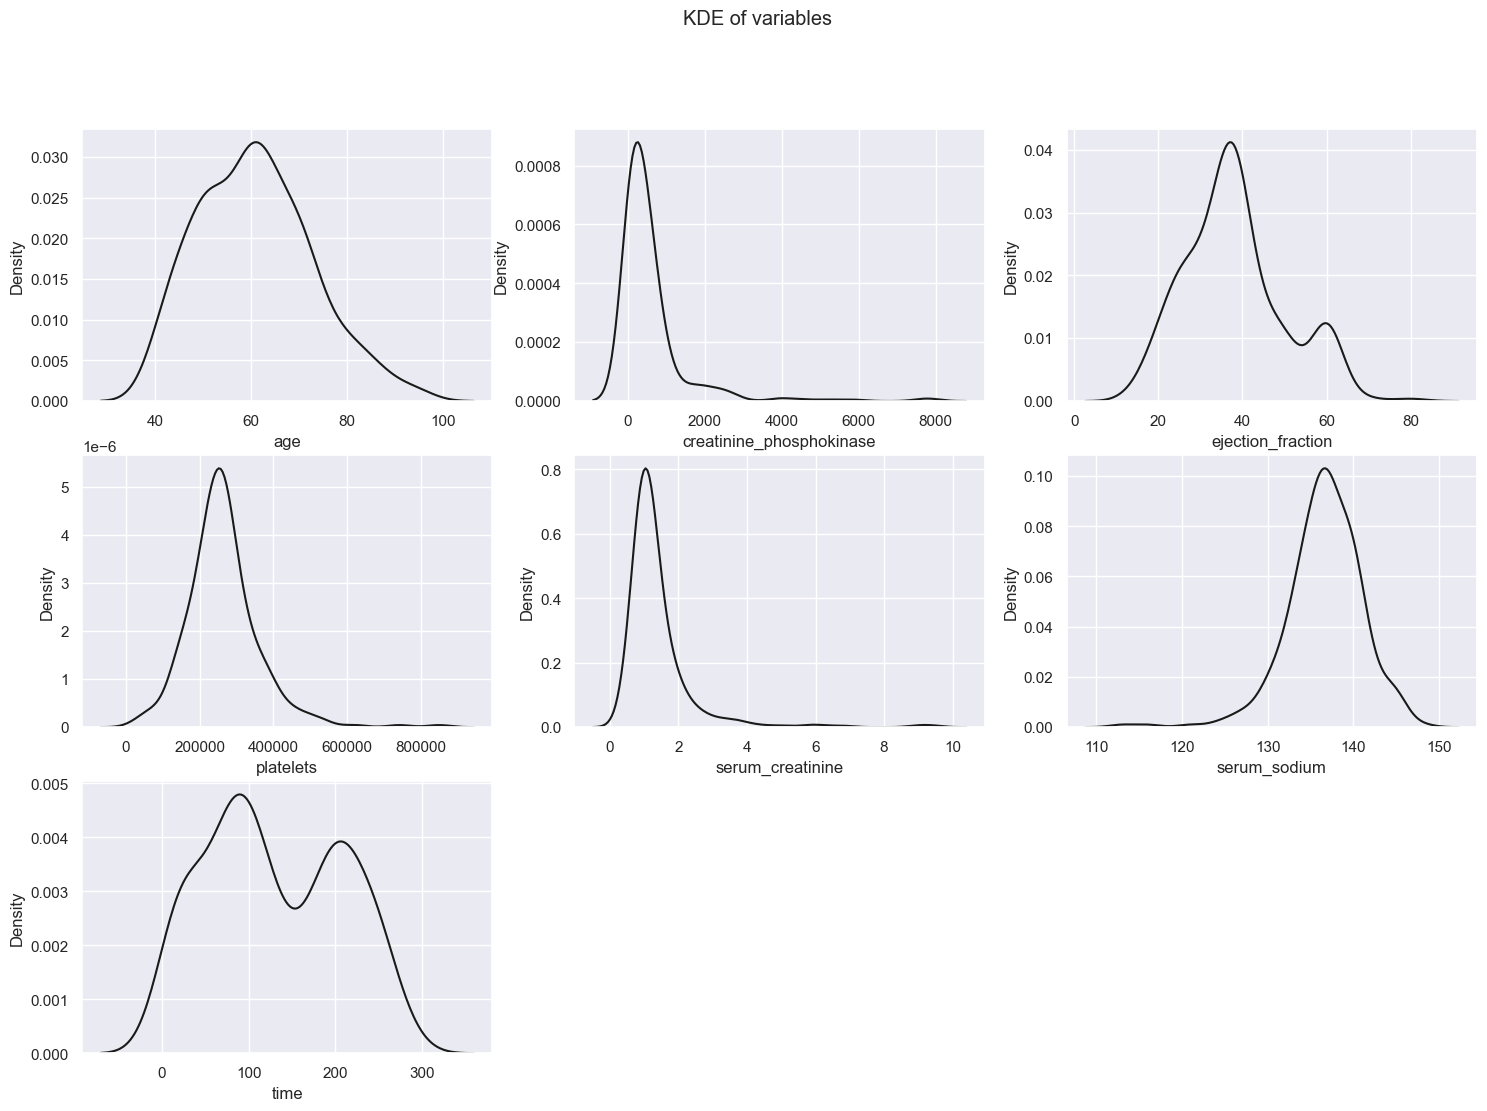

In [12]:
# Distributions of quantitative data
plt.figure(figsize = (18,12))
plt.suptitle('KDE of variables')
for i,var in enumerate(quantitative_var):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data = data , x = data[var] , color = 'k')
    

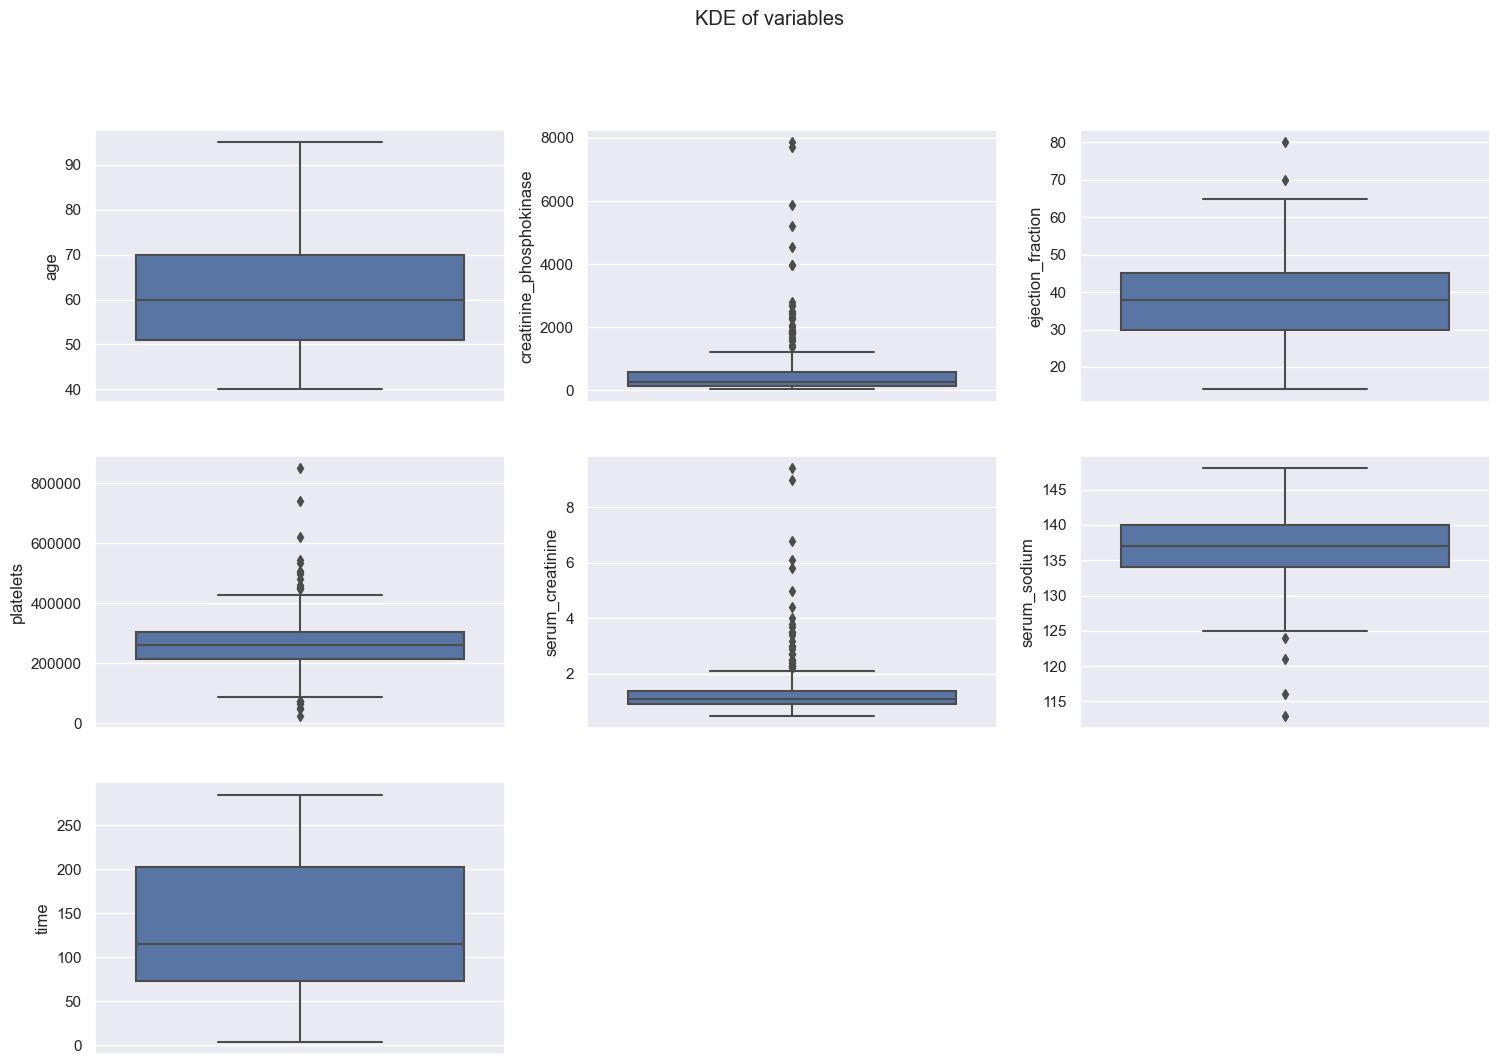

In [13]:
# Distributions of quantitative data
plt.figure(figsize = (18,12))
plt.suptitle('KDE of variables')
for i,var in enumerate(quantitative_var):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = data[var])

In [14]:
### Possibilité de Valeurs abrantes sur certaines variables  : 
## creatine , ejection , platelets , serum , serum_sodium 

In [15]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


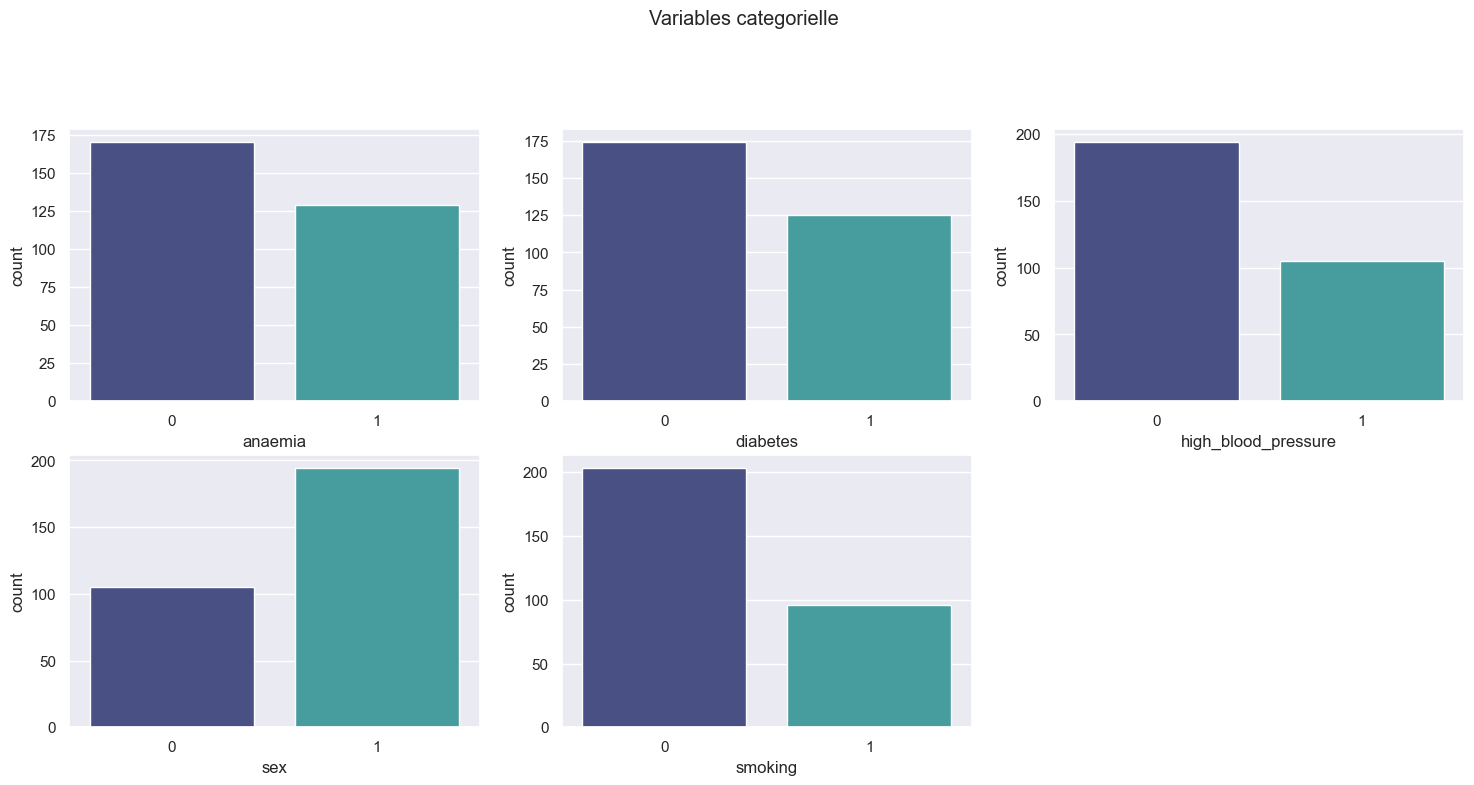

In [16]:
# Distributions of qualitatif  data
plt.figure(figsize = (18,12))
plt.suptitle('Variables categorielle')
for i,var in enumerate(categorical_var):
    plt.subplot(3,3,i+1)
    sns.countplot(data = data , x = data[var] ,  palette='mako')

In [17]:
### correlation entre les variables

In [18]:
def correlation_data(dataframe , target):
    """
    Plots the correlation matrix and the correlation with the target variable
    """
    plt.figure(figsize = (7,4))
    
    CorrelationMatrix = data.corr()
    sns.heatmap(CorrelationMatrix)

    Correlation = CorrelationMatrix.loc[target, :]
    Correlation = Correlation.sort_values(ascending=False)
    fig = plt.figure(figsize=(7,4))
    sns.barplot(x = Correlation[1:],y= Correlation.index[1:], orient='h',palette='mako')
    plt.xlabel(target +  ' correlations')
    fig.autofmt_xdate()

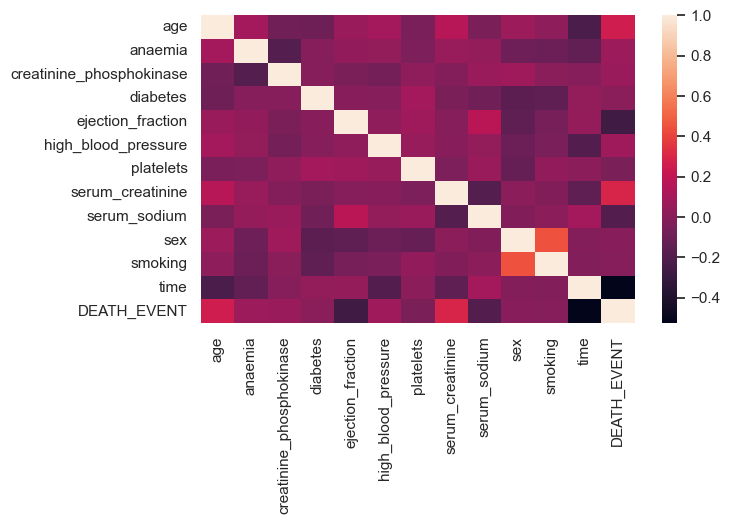

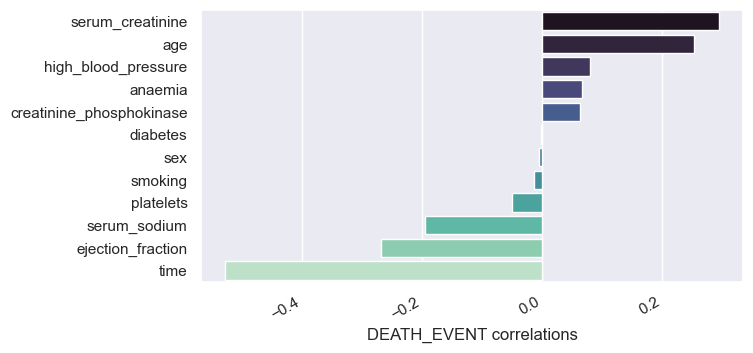

In [19]:
correlation_data(data , 'DEATH_EVENT')

In [20]:
y = data['DEATH_EVENT']
data.drop('DEATH_EVENT' , axis = 1  , inplace = True)

In [21]:
transformed_var = ['creatinine_phosphokinase' , 'serum_creatinine' , 'platelets'] 
# Transformation logarithmique
data[transformed_var] = np.log(data[transformed_var])

<Axes: >

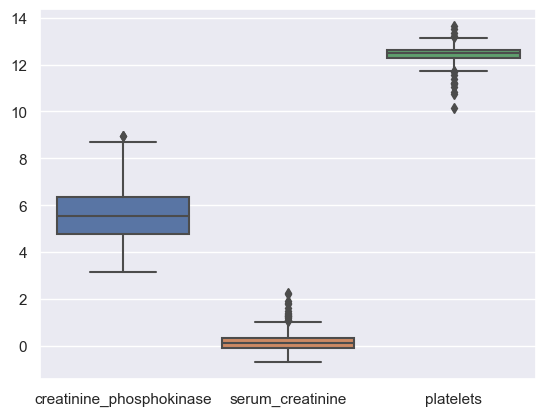

In [22]:
sns.boxplot(data[transformed_var])

In [23]:
#### Valeurs aberantes reglées
transformed_var

['creatinine_phosphokinase', 'serum_creatinine', 'platelets']

In [24]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,5.659896,0.418060,38.083612,0.351171,12.410272,0.198587,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,1.134439,0.494067,11.834841,0.478136,0.401100,0.453108,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,3.135494,0.000000,14.000000,0.000000,10.130623,-0.693147,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,4.757808,0.000000,30.000000,0.000000,12.266694,-0.105361,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,5.521461,0.000000,38.000000,0.000000,12.476100,0.095310,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,6.366470,1.000000,45.000000,1.000000,12.623136,0.336472,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,8.969669,1.000000,80.000000,1.000000,13.652992,2.240710,148.000000,1.000000,1.00000,285.000000


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

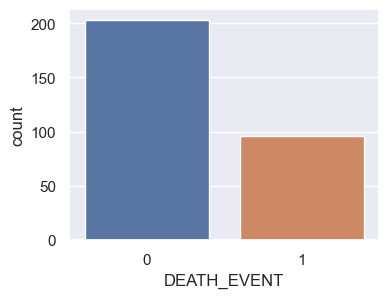

In [25]:
plt.figure(figsize = (4,3))
sns.countplot(x = y)

In [26]:
### On remarque la variable cible est tres desequilibré 

In [27]:
# SMOTETomek
imb = SMOTETomek()
data , y = imb.fit_resample(data , y)

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

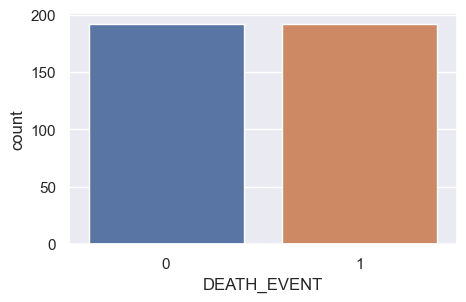

In [28]:
plt.figure(figsize=(5,3))
sns.countplot(x = y)

In [29]:
### la variables cible a été équilibré avec SMOTEtomek 

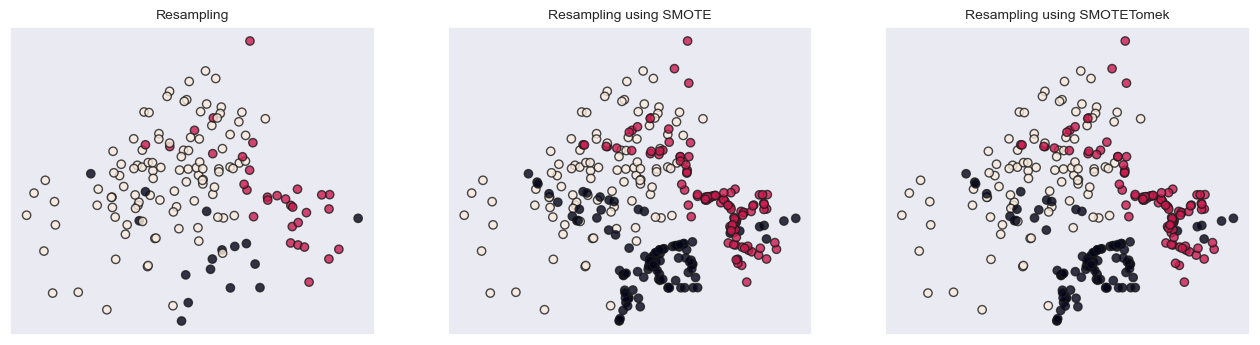

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from collections import Counter

from sklearn.datasets import make_classification

'''
Illustration of SMOTETomek
'''

X_ex, y_ex = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.2, 0.7],
    class_sep=0.8,
    random_state=0,
)

plt.figure(figsize = (16,4))
plt.subplot(131)
plt.scatter(X_ex[:, 0], X_ex[:, 1], c=y_ex, alpha=0.8, edgecolor="k")
plt.yticks([])
plt.xticks([])
plt.title(f"Resampling" , fontsize = 'small')


plt.subplot(132)
X_res, y_res = SMOTE(random_state=0).fit_resample(X_ex, y_ex)
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
plt.yticks([])
plt.xticks([])
plt.title(f"Resampling using SMOTE" , fontsize = 'small')

plt.subplot(133)
X_res, y_res = SMOTETomek(random_state=0).fit_resample(X_ex, y_ex)
plt.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
plt.yticks([])
plt.xticks([])
plt.title(f"Resampling using SMOTETomek" , fontsize = 'small')

plt.show()


<Axes: ylabel='count'>

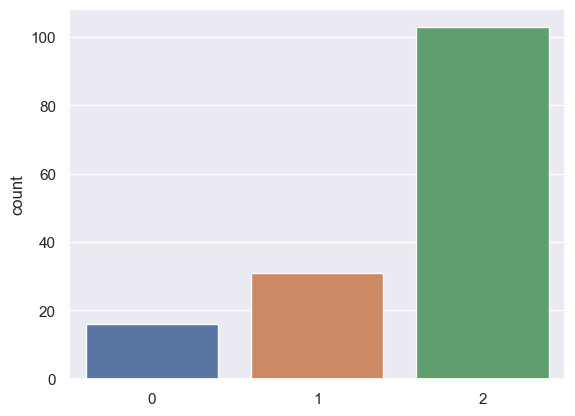

In [31]:
sns.countplot(x = y_ex)

In [32]:
X_ex[:, 0]

array([-0.17520546,  0.48197371,  0.85032168, -0.89300445, -1.57614367,
        2.18774659, -2.12790402, -1.67657741, -1.28426331,  1.49441745,
       -0.24821647, -1.19722765,  0.69210461, -0.31850147,  0.75061216,
       -1.60615492, -1.05140026,  0.27639316,  1.49699772, -0.09169127,
       -0.18603972,  0.564088  ,  0.40217898, -0.3441009 ,  0.04212709,
        1.40242301, -0.36279563,  1.24897206,  0.08363927, -0.53132377,
        1.07455373, -1.19434099, -1.27231087,  0.23755733, -0.17009956,
       -0.21277875,  0.82271436, -1.09990865, -0.3956017 , -0.57373829,
       -1.74309976, -0.6384803 , -0.8742561 , -0.02805966, -0.25228045,
        2.20162075, -1.53080559,  0.25076685, -2.35549583,  1.61829317,
        0.70240477, -1.34601487, -0.16171855, -0.09743018, -1.25468933,
       -1.50028391, -0.44662712,  0.47261425, -0.15397496,  1.62696494,
       -0.38930498,  0.67497665,  1.52390389,  0.67798616, -1.70921261,
       -0.894534  ,  0.19305153, -1.08663708, -0.04901554, -0.13

### MODELISATION 

### Modelisation Debut Apres test 

In [33]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier,BaggingClassifier

from sklearn.model_selection import cross_val_predict,cross_val_score,RandomizedSearchCV,GridSearchCV,KFold
from sklearn.metrics import accuracy_score , make_scorer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix

from scipy.stats import uniform

from sklearn.model_selection import train_test_split 

import random


In [34]:
random.seed(42)

In [35]:
X_train , X_test , y_train , y_test = train_test_split(data , y , test_size=0.2 , random_state=42)

In [36]:
model1 = make_pipeline(StandardScaler() , LogisticRegression(random_state=42) )
model1.fit(X_train , y_train )
print(f"Score model1     :{model1.score(X_train, y_train)}")
print(f"Score model1     : {model1.score(X_test, y_test )}")

Score model1     :0.8599348534201955
Score model1     : 0.8311688311688312


In [37]:
cross_val1 = cross_val_score(model1 ,X_train , y_train , cv = 5)
cross_val_1 = cross_val_score(model1 ,X_test , y_test , cv = 5)
np.mean(cross_val1)

0.8370703331570597

In [38]:
model2 = make_pipeline(StandardScaler() , ExtraTreesClassifier(random_state=42))
model2.fit(X_train , y_train )
print(f"Score model2     :{model2.score(X_train, y_train)}")
print(f"Score model2     : {model2.score(X_test, y_test )}")

Score model2     :1.0
Score model2     : 0.8961038961038961


In [39]:
cross_val2 = cross_val_score(model2 ,X_train , y_train , cv = 5)
cross_val_2 = cross_val_score(model2 ,X_test , y_test , cv = 5)
np.mean(cross_val2)

0.9087255420412481

In [40]:
Scaler  = MinMaxScaler()

In [41]:
model3 = make_pipeline(Scaler, AdaBoostClassifier(random_state=42))
model3.fit(X_train , y_train )
print(f"Score model3     :{model3.score(X_train, y_train)}")
print(f"Score model3     : {model3.score(X_test, y_test )}")

Score model3     :0.9837133550488599
Score model3     : 0.8441558441558441


In [42]:
cross_val3 = cross_val_score(model3 ,X_train , y_train , cv = 5)
cross_val_3 = cross_val_score(model3 ,X_test , y_test , cv = 5)
print(cross_val3)
print(cross_val_3)
np.mean(cross_val3)

[0.87096774 0.87096774 0.86885246 0.75409836 0.85245902]
[0.875      0.8125     0.8        0.86666667 1.        ]


0.8434690639873083

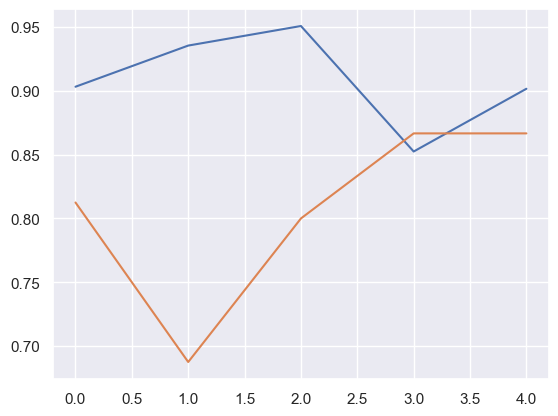

In [43]:
plt.plot(cross_val2)
plt.plot(cross_val_2)

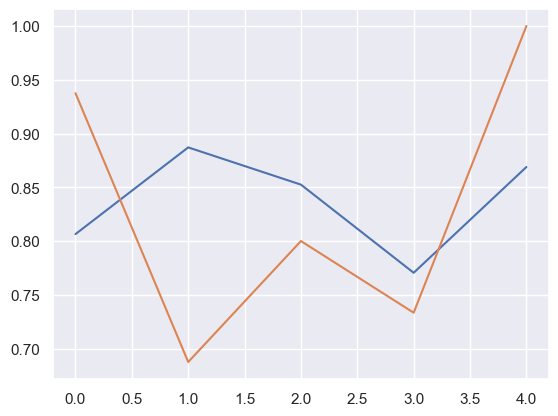

In [44]:
plt.plot(cross_val1)
plt.plot(cross_val_1)

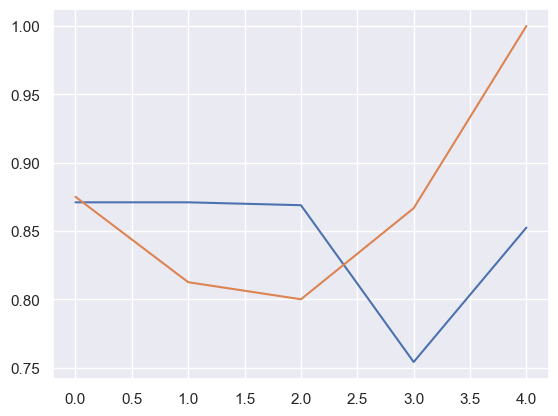

In [45]:
plt.plot(cross_val3)
plt.plot(cross_val_3)

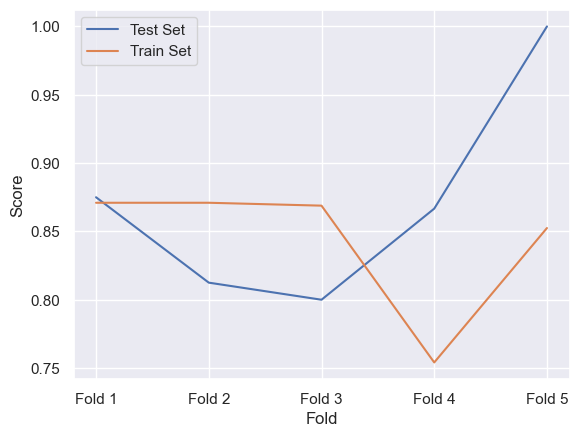

In [46]:
# Étiquettes des plis de validation croisée
fold_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Création de la figure et des axes
fig, ax = plt.subplots()

# Tracé des scores de validation croisée pour l'ensemble de test
ax.plot(fold_labels, cross_val_3, label='Test Set')

# Tracé des scores de validation croisée pour l'ensemble d'entraînement
ax.plot(fold_labels, cross_val3, label='Train Set')

# Définition des étiquettes des axes
ax.set_xlabel('Fold')
ax.set_ylabel('Score')

# Ajout d'une légende
ax.legend()

# Affichage du graphique
plt.show()


In [47]:
print(cross_val1 )
print(cross_val_1 )

[0.80645161 0.88709677 0.85245902 0.7704918  0.86885246]
[0.9375     0.6875     0.8        0.73333333 1.        ]


In [48]:
print(cross_val2 )
print(cross_val_2 )

[0.90322581 0.93548387 0.95081967 0.85245902 0.90163934]
[0.8125     0.6875     0.8        0.86666667 0.86666667]


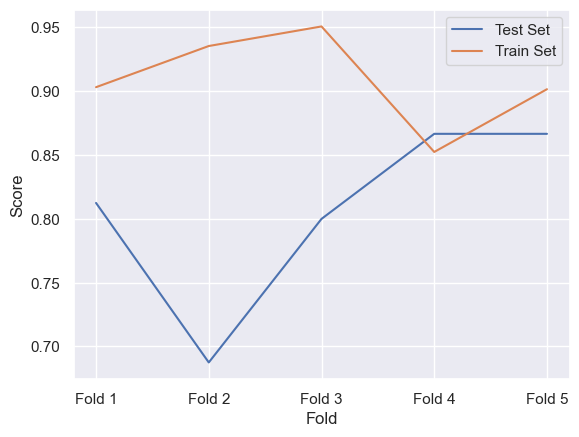

In [49]:
# Étiquettes des plis de validation croisée
fold_labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Création de la figure et des axes
fig, ax = plt.subplots()

# Tracé des scores de validation croisée pour l'ensemble de test
ax.plot(fold_labels, cross_val_2, label='Test Set')

# Tracé des scores de validation croisée pour l'ensemble d'entraînement
ax.plot(fold_labels, cross_val2, label='Train Set')

# Définition des étiquettes des axes
ax.set_xlabel('Fold')
ax.set_ylabel('Score')

# Ajout d'une légende
ax.legend()

# Affichage du graphique
plt.show()

In [50]:
### on trace les scores des modeles sous formes de barres
# knn
# extratressclassifier 
# randomforest 
# logisticRegreesion
# SVC 

In [51]:
scaler = MinMaxScaler()
knn = make_pipeline(scaler , KNeighborsClassifier())

knn.fit(X_train , y_train)
print(knn.score(X_train , y_train))
print(knn.score(X_test , y_test))

0.8501628664495114
0.5974025974025974


In [52]:
y_pred1 = knn.predict(X_test)

In [53]:
confusion_matrix1 = confusion_matrix(y_pred1 , y_test)

In [54]:
confusion_matrix1

array([[21, 17],
       [14, 25]], dtype=int64)

In [55]:
lr = model1 
knn = knn 
ext = model2
ada = model3

In [56]:
#MLP Multi Layers perceptron qui est un reseau de neuones avec couches 
# d'ntre et de sortie et des layers a l'interierur(couch cach)


mlp = make_pipeline(scaler , MLPClassifier(max_iter = 5000))

mlp.fit(X_train , y_train)
mlp.score(X_train , y_train)
mlp.score(X_test , y_test)

0.8571428571428571

In [57]:
def score_cv(clf ,X_train = data , y_train = y , cv = None) : 
    ' return la moyenne des scores de cross_val'
    
    return np.mean(cross_val_score(clf , X_train , y_train , cv = cv ))


In [58]:
# SVC
svc = make_pipeline(scaler , SVC())
svc.fit(X_train , y_train)
print(svc.score(X_train , y_train))
print(svc.score(X_test , y_test))

0.9022801302931596
0.8051948051948052


In [59]:
# Randomforestclassifier

rf = make_pipeline(scaler , RandomForestClassifier(n_jobs = -1))
rf.fit(X_train , y_train)
print(rf.score(X_train , y_train))
print(rf.score(X_test , y_test))

1.0
0.9090909090909091


In [60]:
clf_list_score  = []

classifiers1 = [('lr' ,lr ) ,  ('ada' ,ada) , ('knn', knn) , ('ext' , ext ) , ('svc', svc) ,('rf' ,rf) , ('mlp' , mlp) ]

for clf in classifiers1 : 
    clf_list_score.append(score_cv(clf[1] , X_train , y_train , cv = 5))
    


In [61]:
clf_list_score

[0.8370703331570597,
 0.8434690639873083,
 0.7005288207297726,
 0.9087255420412481,
 0.8305129561078793,
 0.8986779481755685,
 0.846853516657853]

In [62]:
clf_names = []

for clf in classifiers1 : 
    print(clf)
    
    clf_names.append(clf[0])
    
clf_names

('lr', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))]))
('ada', Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))]))
('knn', Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]))
('ext', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(random_state=42))]))
('svc', Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())]))
('rf', Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier(n_jobs=-1))]))
('mlp', Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier', MLPClassifier(max_iter=5000))]))


['lr', 'ada', 'knn', 'ext', 'svc', 'rf', 'mlp']

Text(0, 0.5, 'models')

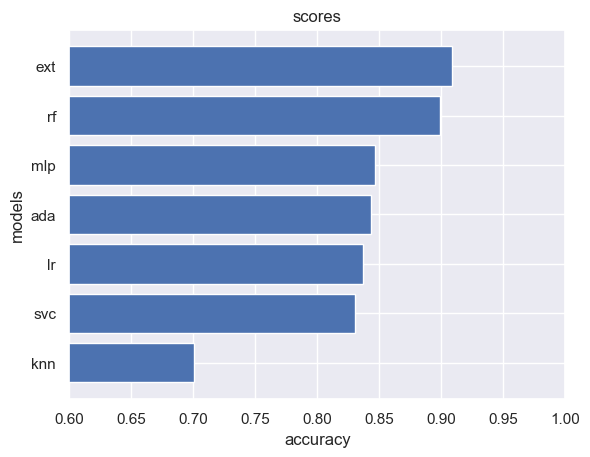

In [63]:
ind = np.argsort(clf_list_score)
plt.xlim(0.6 , 1)
plt.barh(range(len(clf_names)) , np.array(clf_list_score)[ind] , alpha =1)
plt.title('scores')
plt.xlabel('accuracy')
plt.yticks(range(len(clf_list_score)) ,np.array(clf_names)[ind])
plt.ylabel('models')

### Hyperparametre reglage

Logistic Regression

In [64]:
param_grid_lr = np.linspace(0.1, 1 ,10)
cv_score_lr = [ score_cv(make_pipeline(MinMaxScaler() ,
                                  LogisticRegression(C = c , max_iter = 10000)) ) for c in param_grid_lr ]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


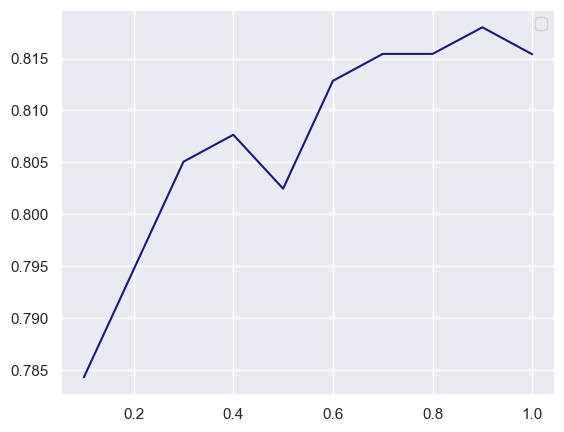

In [65]:
plt.figure(figsize = (14 ,5))
plt.title('Hyperparameter tuning Logistic Regression' , fontsize = 'small')
ax1 = plt.subplot(121)
plt.legend()
plt.plot(param_grid_lr , cv_score_lr , color = 'midnightblue')

In [66]:
#SVC
param_grid_svc = np.linspace(1 ,300, 500)
cv_score_svc = [ score_cv(make_pipeline(MinMaxScaler()
                                  ,SVC( C = c , max_iter = 10000))) for c in param_grid_svc]

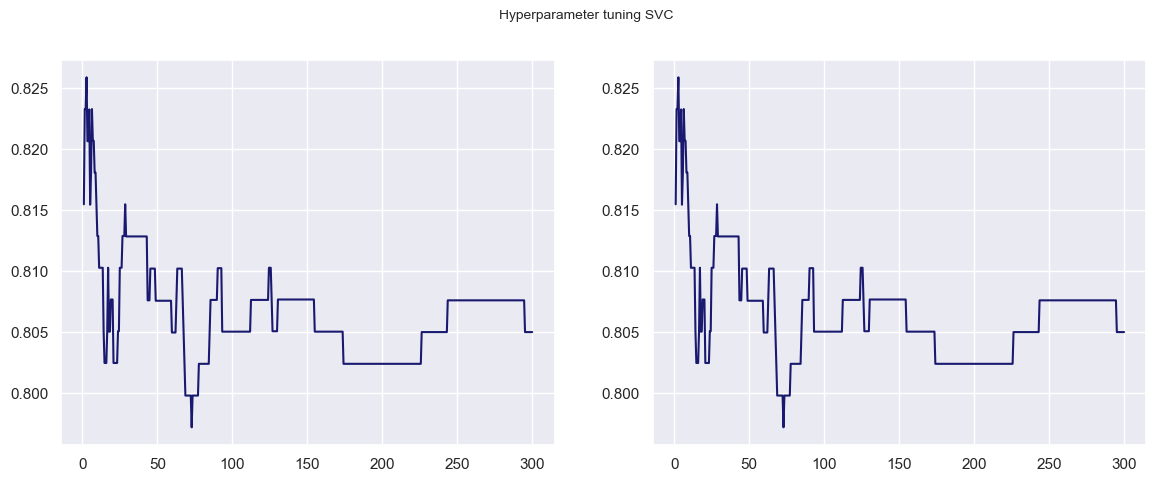

In [67]:
plt.figure(figsize = (14 ,5))
plt.suptitle('Hyperparameter tuning SVC' , fontsize = 'small')
ax1 = plt.subplot(121)
plt.plot(param_grid_svc , cv_score_svc , color = 'midnightblue')

plt.subplot(122, sharey = ax1)
plt.plot(param_grid_svc1 , cv_score_svc1 , color = 'midnightblue')
plt.show()

In [68]:
##Hyperparametre rf 

In [69]:
param_grid_rf = np.arange(100,170 ,5)

print(param_grid_rf)

cv_score_rf=[score_cv(make_pipeline(MinMaxScaler(),RandomForestClassifier(n_estimators=c)))
                                                                                     for c in param_grid_rf]

[100 105 110 115 120 125 130 135 140 145 150 155 160 165]


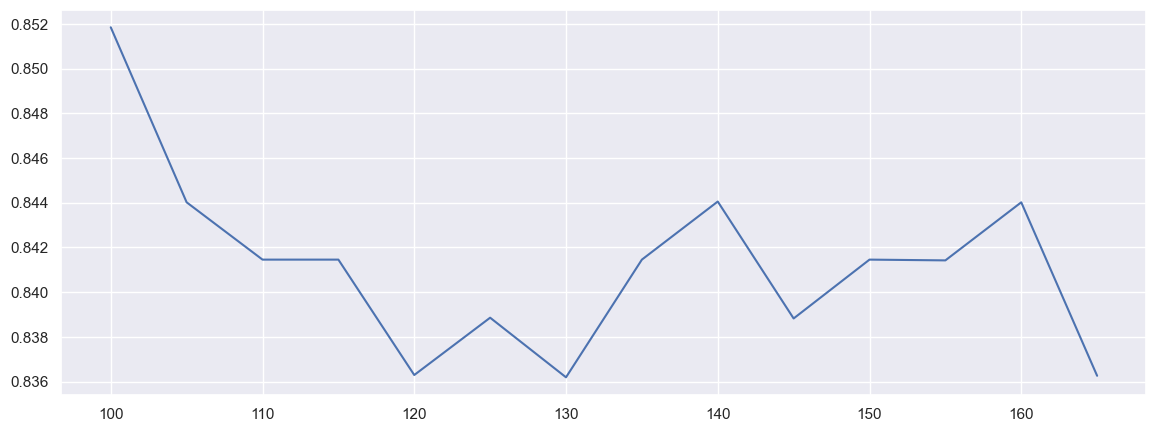

In [70]:
plt.figure(figsize = (14 ,5))
plt.plot(param_grid_rf , cv_score_rf)


In [71]:
# knn
param_grid_knn = np.arange(1,101)

cv_score_knn = [score_cv(make_pipeline(MinMaxScaler() , KNeighborsClassifier(n_neighbors= c ))) for c in param_grid_knn ]

param_grid_knn1 = np.arange(101,203)
cv_score_knn1 = [score_cv(make_pipeline(MinMaxScaler() , KNeighborsClassifier(n_neighbors= c ))) for c in param_grid_knn1 ]




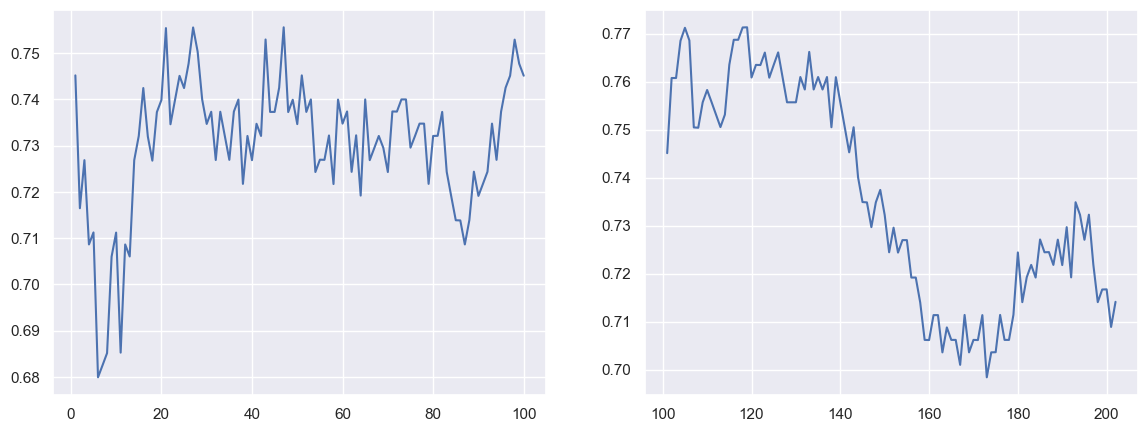

In [72]:
plt.figure(figsize = (14 ,5))

plt.subplot(121)
plt.plot(param_grid_knn , cv_score_knn)


plt.subplot(122)
plt.plot(param_grid_knn1 , cv_score_knn1)

In [73]:
# extratressclassifier 

param_grid_ex = np.arange(10, 200 , 20)
cv_score_ex = [ score_cv(make_pipeline(MinMaxScaler(),
                                 ExtraTreesClassifier(n_estimators=c , n_jobs=-1))) for c in param_grid_ex]

param_grid_ex1 = np.arange(200, 350 , 20)
cv_score_ex1 = [ score_cv(make_pipeline(MinMaxScaler(),
                                 ExtraTreesClassifier(n_estimators=c , n_jobs=-1))) for c in param_grid_ex1]

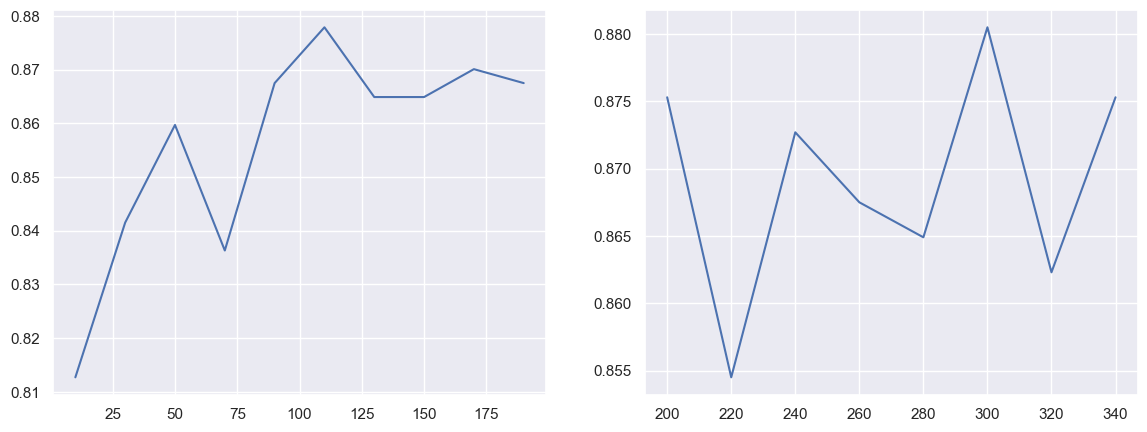

In [74]:
plt.figure(figsize = (14 ,5))

plt.subplot(121)
plt.plot(param_grid_ex , cv_score_ex)


plt.subplot(122)
plt.plot(param_grid_ex1 , cv_score_ex1)

In [75]:
### Adaboost hyperparametre  

param_grid_ada = np.arange(60, 500, 10)
cv_score_ada = [ score_cv(make_pipeline(MinMaxScaler(),
                                 AdaBoostClassifier(n_estimators=c ))) for c in param_grid_ada]



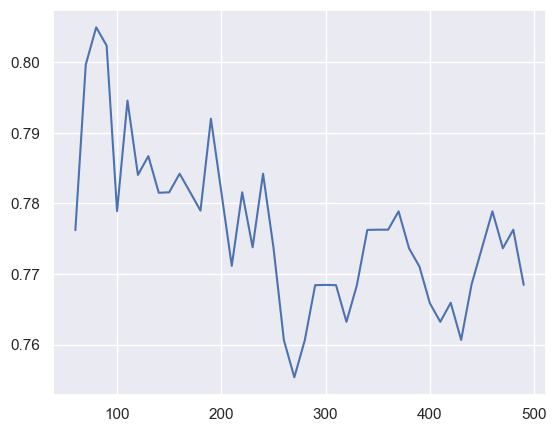

In [76]:
plt.figure(figsize = (14 ,5))

plt.subplot(121)
plt.plot(param_grid_ada , cv_score_ada)



In [77]:
'''
   tracons les score pour hyperparametre reglés et  non reglés pour observer quels model ont eu un score elevé avec le reglage 
   d'hyperparametre

'''

"\n   tracons les score pour hyperparametre reglés et  non reglés pour observer quels model ont eu un score elevé avec le reglage \n   d'hyperparametre\n\n"

In [78]:
### ada
### rf 
### knn 
### lr
### ext
### svc

#param_grid_lr , cv_score_lr 
#param_grid_svc , cv_score_svc 
#param_grid_rf , cv_score_rf
#param_grid_ex , cv_score_ex
#param_grid_ada , cv_score_ada

In [79]:
classifiers0 = [('lr',  lr) ,('knn' , knn) , ('ext' , ext), ('rf' , rf ) , ('svc' , svc ) , ('ada' , ada) ]

In [80]:
classifiers_name0 = []
for clf in classifiers0 :
    classifiers_name0.append(clf[0])


In [81]:
#best_logistic_reg
best_score_lr = max(cv_score_lr)
best_param_lr = param_grid_lr[cv_score_lr.index(best_score_lr)]

print("Meilleur score :", best_score_lr)
print("Paramètre correspondant :", best_param_lr)


Meilleur score : 0.8180109364319892
Paramètre correspondant : 0.9


In [82]:
# best randomforest
best_score_rf = max(cv_score_rf)
best_param_rf = param_grid_rf[cv_score_rf.index(best_score_rf)]

print("Meilleur score :", best_score_rf)
print("Paramètre correspondant :", best_param_rf)

Meilleur score : 0.8518455228981544
Paramètre correspondant : 100


In [83]:
# best adaboost
best_score_ada = max(cv_score_ada)
best_param_ada = param_grid_ada[cv_score_ada.index(best_score_ada)]

print("Meilleur score :", best_score_ada)
print("Paramètre correspondant :", best_param_ada)

Meilleur score : 0.8049555707450444
Paramètre correspondant : 80


In [84]:
# extratress
best_score_ex = max(cv_score_ex)
best_param_ex = param_grid_ex[cv_score_ex.index(best_score_ex)]

print("Meilleur score :", best_score_ex)
print("Paramètre correspondant :", best_param_ex)

Meilleur score : 0.877887901572112
Paramètre correspondant : 110


In [85]:
#SVC 

best_score_svc = max(cv_score_svc)
best_param_svc = param_grid_svc[cv_score_svc.index(best_score_svc)]

print("Meilleur score :", best_score_svc)
print("Paramètre correspondant :", best_param_svc)

Meilleur score : 0.8258714969241284
Paramètre correspondant : 2.7975951903807617


In [86]:
#Knn

best_score_knn = max(cv_score_knn)
best_param_knn = param_grid_knn[cv_score_knn.index(best_score_knn)]

print("Meilleur score :", best_score_knn)
print("Paramètre correspondant :", best_param_knn)

Meilleur score : 0.7555707450444292
Paramètre correspondant : 47


In [87]:
Score_tuned = [] 

In [88]:
Score_tuned = [best_score_lr ,best_score_rf , best_score_ada , best_score_ex , best_score_svc ,best_score_knn ]

In [89]:
Score_tuned

[0.8180109364319892,
 0.8518455228981544,
 0.8049555707450444,
 0.877887901572112,
 0.8258714969241284,
 0.7555707450444292]

In [90]:
names_tuned = ['lr' ,'rf' , 'ada' , 'ex' , 'svc' , 'knn'  ]

Text(0, 0.5, 'models')

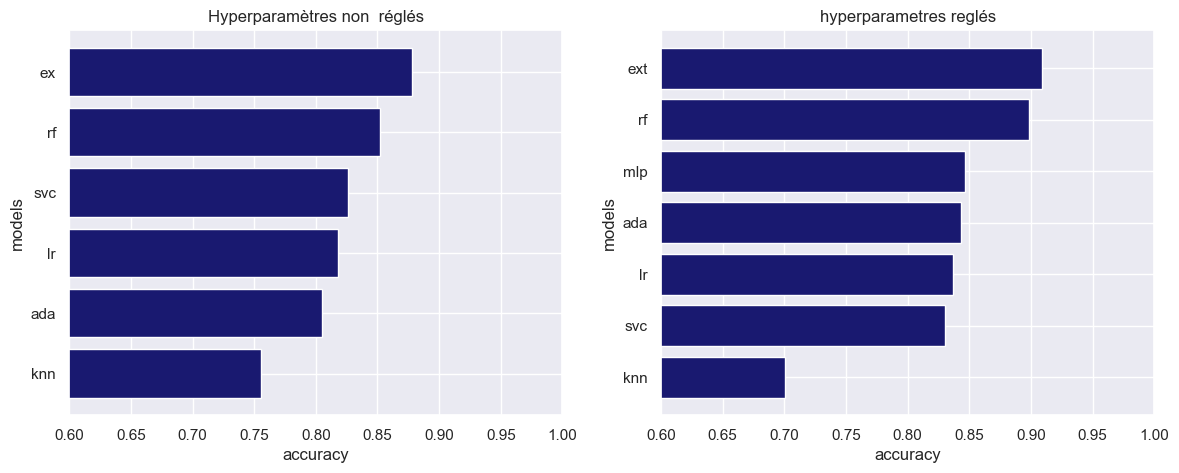

In [91]:
plt.figure(figsize= (14,5))
plt.subplot(121)
ind1 = np.argsort(Score_tuned)
plt.xlim(0.6 , 1)
plt.barh(range(len(names_tuned)) , np.array(Score_tuned)[ind1] , color = 'midnightblue')
plt.title('Hyperparamètres non  réglés')
plt.xlabel('accuracy')
plt.yticks(range(len(Score_tuned)) ,np.array(names_tuned)[ind1] )
plt.ylabel('models')

plt.subplot(122)
ind = np.argsort(clf_list_score)
plt.xlim(0.6 , 1)
plt.barh(range(len(clf_names)) , np.array(clf_list_score)[ind] , color = 'midnightblue')
plt.title('hyperparametres reglés')
plt.xlabel('accuracy')
plt.yticks(range(len(clf_list_score)) ,np.array(clf_names)[ind])
plt.ylabel('models')

## Neural Networks

In [92]:
###################